In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [7]:

import pandas as pd
import os
import json
from scipy.io import wavfile
import glob
import collections
import matplotlib.pyplot as plt
from python_speech_features import mfcc
import csv
import os
import wave
from scipy.io.wavfile import read
from sklearn import preprocessing as pp
import numpy as np
import librosa
import librosa.display
import sklearn
import sklearn.ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import decomposition 
#from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn import cross_validation
from sklearn.neural_network import MLPClassifier
import pickle
import random

In [8]:
dataset = []

def loadDataset(filename, split, trSet, teSet):
    with open('my1.dat', 'rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break
    for x in range(len(dataset)):
        if random.random() < split:
            trSet.append(dataset[x])
        else:
            teSet.append(dataset[x])
trainingSet = []
testSet = []
loadDataset('my1.dat', 0.66, trainingSet, testSet)
print(np.shape(trainingSet))
print(testSet[100][2])

(647, 3)
3


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [30]:
from itertools import chain

In [ ]:
sc = StandardScaler()
print(sc)
#dataset1 = sc.fit_transform(dataset[:, 0:40])
dataset1 = dataset[:, 0:40]
print(dataset1.shape)
print(dataset1[3].mean())
print(dataset1[2].shape)
print(dataset1[2])

In [37]:
train_X=[];
train_y=[];
test_X=[];
test_y=[];


for i in range (np.shape(trainingSet)[0]-1):
    train_X.append(trainingSet[i][0:1])
    train_y.append(trainingSet[i][2])
#print(np.shape(trainingSet)[0][0])    
for i in range (np.shape(testSet)[0]):
    test_X.append(testSet[i][0:1])
    test_y.append(testSet[i][2])   
train_x=[];
test_x=[];

for i in train_X:  
    train_x.append(np.asarray(i))
for i in test_X:  
    test_x.append(np.asarray(i))    
print(len(train_x))
x=[];y=[];
for i in range (len(train_x)):
    x.append(list(chain.from_iterable(train_x[i])))
for i in range (len(test_x)):
    y.append(list(chain.from_iterable(test_x[i])))    

print(len(train_y))

    

646
646


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [39]:
cls = sklearn.ensemble.RandomForestClassifier(n_estimators = 10 , criterion = 'entropy' , min_samples_split = 8)
#print(train_x)
#print(train_y.shape)
#for i in range(len(train_x)):
models = []
accuracy = []
cls.fit(x , train_y)
Y = cls.predict(y)
models.append('random-forest')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ', accuracy_score(test_y , Y)*100)

Accuracy :  47.72727272727273


In [40]:
random_forest_file_name = 'random_forest1.pkl'
random_forest_model_pkl = open(random_forest_file_name , 'wb')
pickle.dump(cls ,random_forest_model_pkl)
random_forest_model_pkl.close()

In [41]:
print('CONFUSION MATRIX')
confusion_matrix(test_y, Y)

CONFUSION MATRIX


array([[21,  0,  2,  1,  0,  1,  6,  0,  0,  3],
       [ 1, 27,  3,  0,  0,  1,  0,  0,  0,  1],
       [ 5,  1, 15,  1,  4,  5,  0,  3,  2,  5],
       [ 3,  0,  1, 11,  2,  2,  3,  6,  0,  8],
       [ 0,  0,  0,  4, 10,  2,  5,  6, 10,  3],
       [ 2,  6,  5,  0,  2, 15,  0,  0,  4,  1],
       [ 6,  0,  0,  0,  2,  2, 19,  0,  0,  6],
       [ 0,  0,  0,  2,  1,  1,  0, 23,  1,  0],
       [ 1,  0,  2,  2,  4,  5,  1,  4, 19,  1],
       [ 6,  1,  2,  6,  1,  2,  2,  2,  1,  8]], dtype=int64)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.47      0.62      0.53        34
           2       0.77      0.82      0.79        33
           3       0.50      0.37      0.42        41
           4       0.41      0.31      0.35        36
           5       0.38      0.25      0.30        40
           6       0.42      0.43      0.42        35
           7       0.53      0.54      0.54        35
           8       0.52      0.82      0.64        28
           9       0.51      0.49      0.50        39
          10       0.22      0.26      0.24        31

    accuracy                           0.48       352
   macro avg       0.47      0.49      0.47       352
weighted avg       0.47      0.48      0.47       352



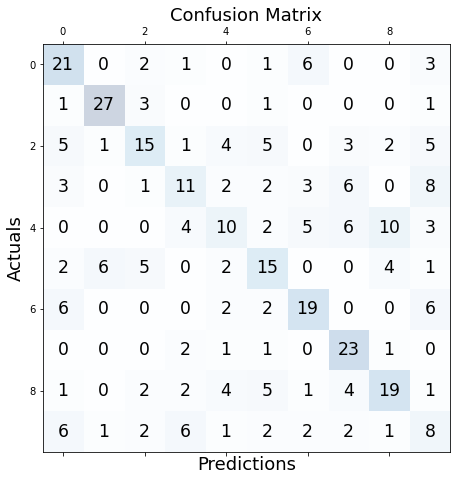

In [45]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, Y))
conf_matrix = confusion_matrix(y_true=test_y, y_pred=Y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.2)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
